In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)


In [4]:
df = pd.read_csv("Big Mart Sales.csv")

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Shape of data

In [6]:
df.shape

(8523, 12)

# Count no. of null in columns

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

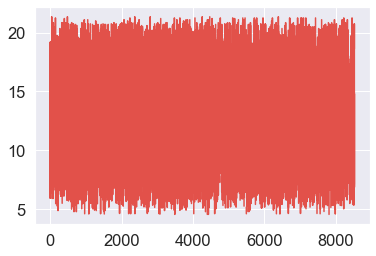

In [8]:
df['Item_Weight'].plot()

# Fill the missing values in column 'Item_Weight' with mean value

In [9]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [10]:
x = set(df.columns) - set(['Item_Outlet_Sales'])
y = ['Item_Outlet_Sales']
x = list(x)
print(x)

['Item_Weight', 'Item_MRP', 'Outlet_Type', 'Outlet_Size', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Item_Visibility', 'Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Location_Type']


# Relationships of variables with Sales

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


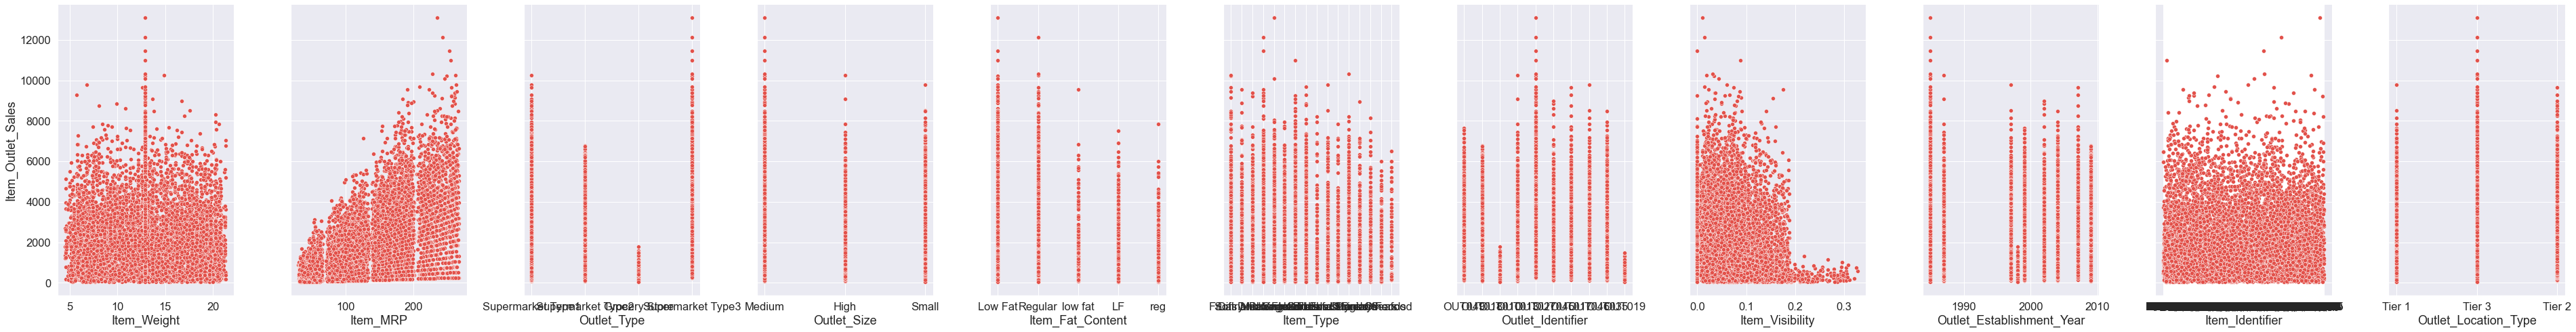

In [11]:
p = sns.pairplot(df, x_vars=x, y_vars='Item_Outlet_Sales', size=7, aspect=0.7)

# No linear relationship observed

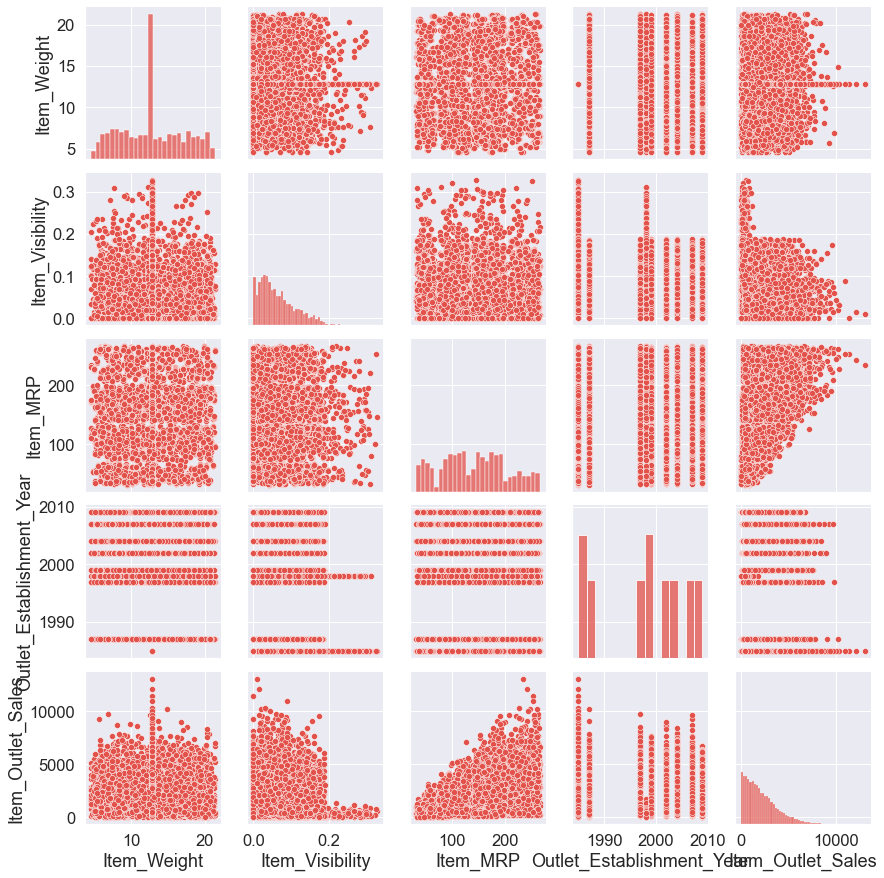

In [12]:
sns.pairplot(df)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


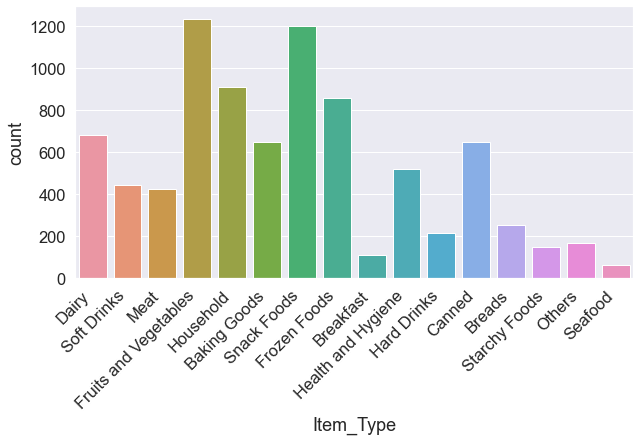

In [13]:
plt.figure(figsize=(10,5))
sns.countplot('Item_Type',data=df)
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

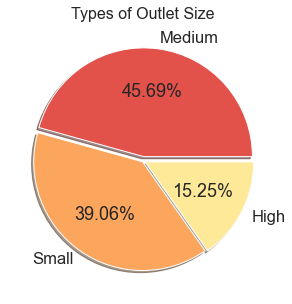

In [14]:
#PROPORTION OF DIFFERENT TYPES OF OUTLET SIZES
plt.figure(figsize=(5,5))
plt.pie(x=df['Outlet_Size'].value_counts(),
        labels=["Medium","Small",'High'],
        autopct='%1.2f%%',
        explode=[0.04,0.01,0.02],shadow=True,)

plt.title("Types of Outlet Size",fontsize=16)
plt.show()


# Encode the non-numeric columns  in the data

In [15]:
df['Outlet_Years']=2020-df['Outlet_Establishment_Year']


In [16]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype('category')
        df[i]=df[i].cat.codes

In [17]:
x = df.drop(["Item_Outlet_Sales"],axis=1)
y = df.Item_Outlet_Sales

# Standardize the data

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

# Split the data in 4:1 for modelling 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [20]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_ = regr.predict(X_train)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_)))

R squared: 0.5102165563606376


In [21]:
bagreg = RandomForestRegressor()
bagreg.fit(X_train,y_train)
y_pred = bagreg.predict(X_train)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9388252298323208


# Random Forest Regressor is better than linear regression for this data

In [24]:
residuals = y_train.values-y_pred


In [25]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9779371321996261), ('p-value', 0.7354510224153377)]

# Since p value is more than 0.05,we can't reject it's null hypothesis that error terms are homoscedastic. Therefore,variance of the residuals is not constant



C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


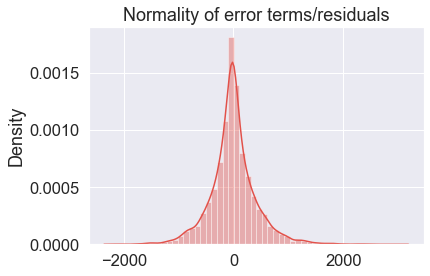

In [26]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# The residual terms are normally distributed and there is no skew 

In [27]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.28522706234685125

#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

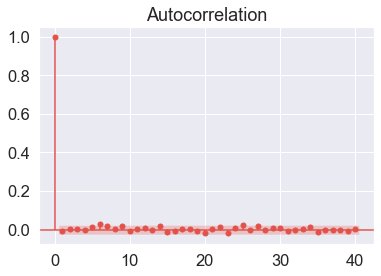

In [28]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

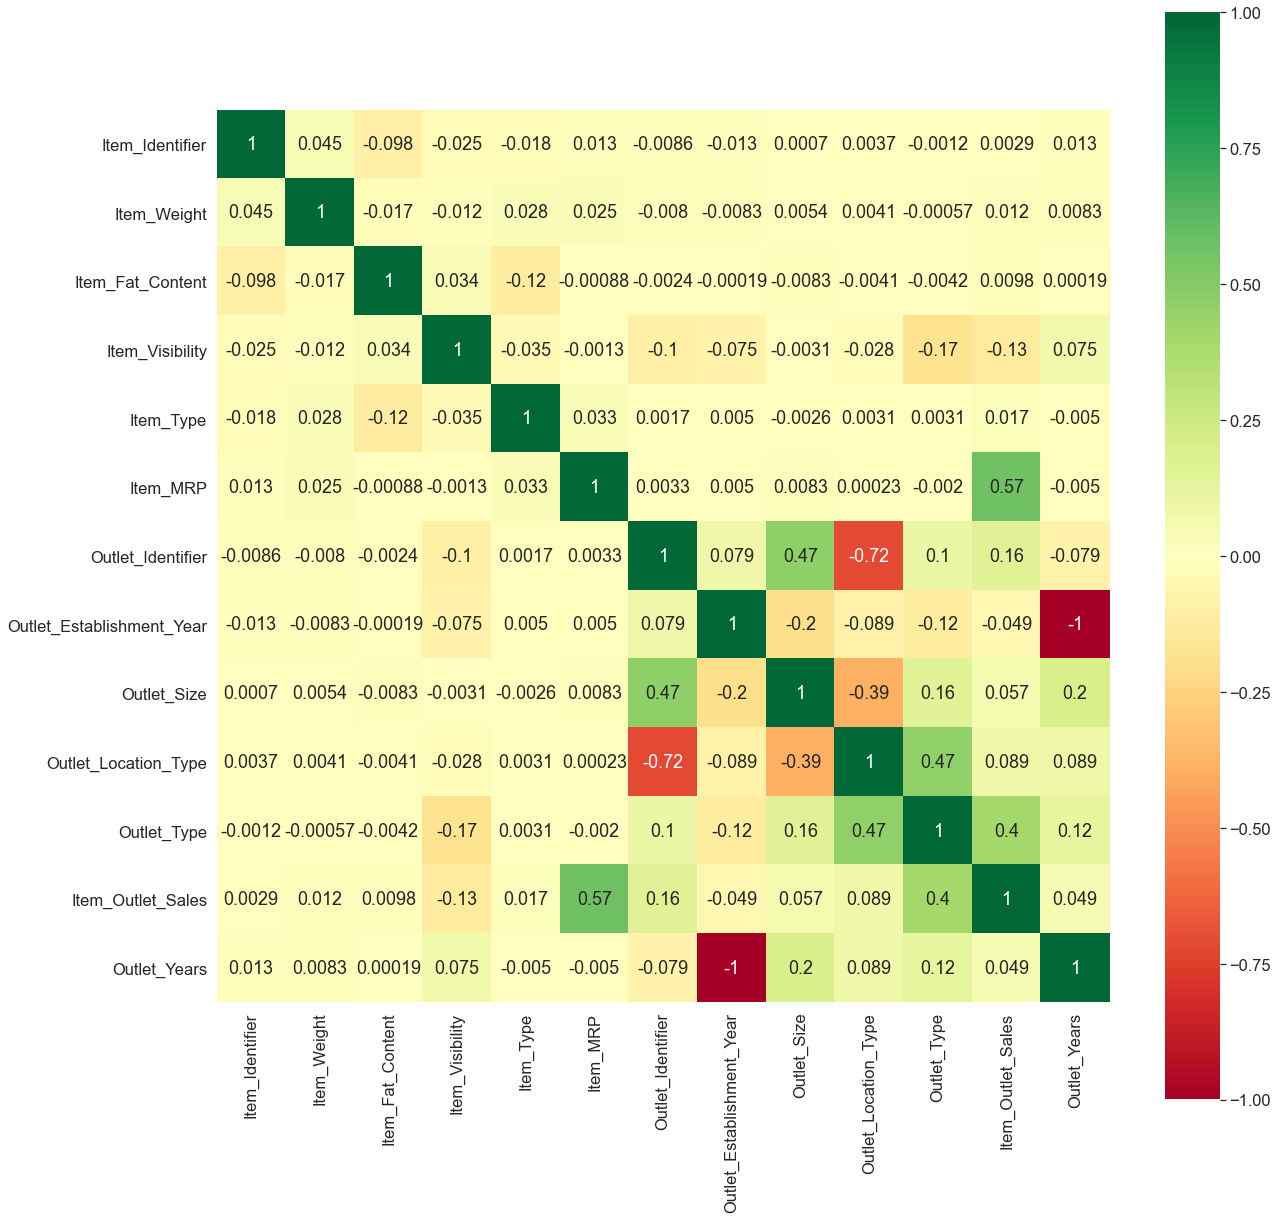

In [30]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

# No very strong correlation among dependent variables